In [2]:
import os
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats as st
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:
elevation_list = [30, 35, 35, 43, 47, 58, 59, 64, 65, 69, 72, 76, 83]

CO2_mean_list = [404, 384, 421, 401, 373, 408, 378, 386, 373, 383, 369, 375, 375]
CO2_std_err_list = [1.44, 0.478, 0.0302, 0.433, 0.144, 0.481, 1.13,  0.282, 0.282, 2.55, 0.282, 1.75, 0.416]
CO2_std_dev_list = [7.07,  2.83,  0.707,  2.12, 0.707,  3.53, 6.36,   1.41,  1.41, 12.7,  1.41, 9.90, 2.12 ]

wind_list = [1.5, 5.8, 0, 0, 5.4, 0, 3, 0, 0.6, 6.6, 5.1, 0, 4]

data = {'Elevation (m)':[30, 35, 35, 43, 47, 58, 59, 64, 65, 69, 72, 76, 83], 'Wind speed (m/s)':[1.5, 5.8, 0, 0, 5.4, 0, 3, 0, 0.6, 6.6, 5.1, 0, 4], 'CO2 (ppm)':[404, 384, 421, 401, 373, 408, 378, 386, 373, 383, 369, 375, 375]}
df = pd.DataFrame(data)
X = df[['Elevation (m)', 'Wind speed (m/s)']].values.reshape(-1,2)
Y = df['CO2 (ppm)']

In [4]:
# Multivariate linear regression plotting

a = np.array(elevation_list)
b = np.array(wind_list)
c = np.array(CO2_mean_list)

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(a.min(), a.max(), 50)
y_pred = np.linspace(b.min(), b.max(), 50)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) 
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T    # .T transposes the array

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

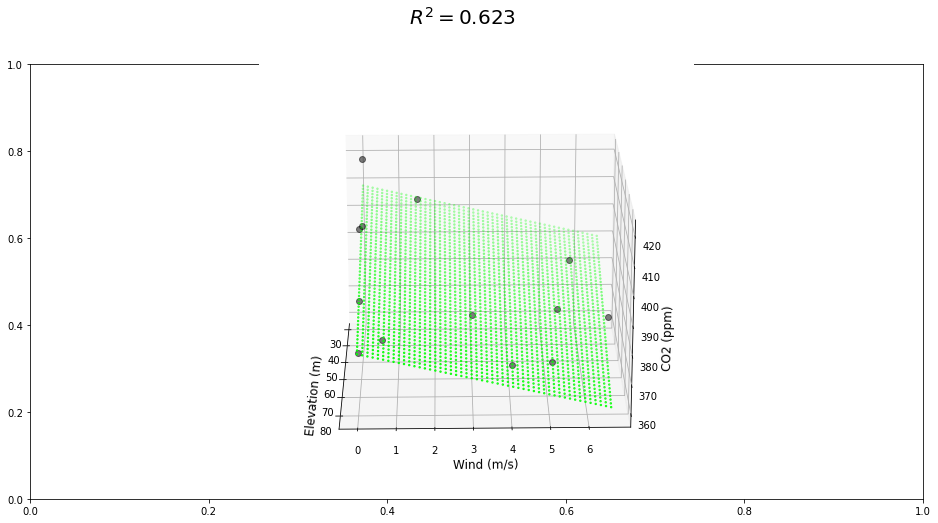

In [5]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))


ax1 = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(132, projection='3d')
#ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1] # , ax2, ax3

fig.suptitle('$R^2 = 0.623$', fontsize=20)
for ax in axes:
    ax.plot(x, y, z, color='k', linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), edgecolor='lime', s=2)
    ax.set_xlabel('Elevation (m)', fontsize=12)
    ax.set_ylabel('Wind (m/s)', fontsize=12)
    ax.set_zlabel('CO2 (ppm)', fontsize=12)
"""   
ax1.view_init(elev=10, azim=15)
ax2.view_init(elev=20, azim=45)
ax3.view_init(elev=10, azim=75)
# plt.savefig(f'Figure.png')""" 

# GIF
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=20, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

"\nax[1].set_title('CO2 data with Std Error as Errbars (n=13)', fontsize=15)\nax[1].set_xlabel('Elevation (m)', fontsize=12)\nax[1].set_ylabel('CO2 Concentration (ppm)', fontsize=12)\nax[1].errorbar(elevation_list, CO2_mean_list, yerr2, fmt='.', markersize=6, markeredgecolor='r', color='black') "

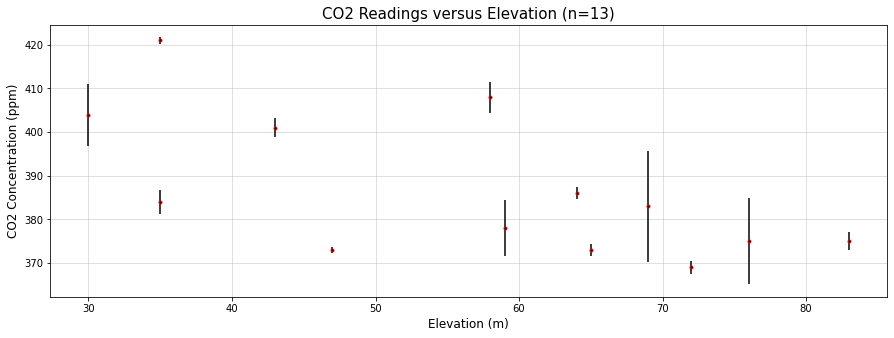

In [6]:
# Plotting
yerr1 = CO2_std_dev_list
yerr2 = CO2_std_err_list

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

ax.set_title('CO2 Readings versus Elevation (n=13)', fontsize=15)
ax.set_xlabel('Elevation (m)', fontsize=12)
ax.set_ylabel('CO2 Concentration (ppm)', fontsize=12)
ax.text(50, 390, '', color = 'black')
ax.errorbar(elevation_list, CO2_mean_list, yerr1, fmt='.', markersize=6, markeredgecolor='r', color='black')
ax.grid(alpha=.5)
"""
ax[1].set_title('CO2 data with Std Error as Errbars (n=13)', fontsize=15)
ax[1].set_xlabel('Elevation (m)', fontsize=12)
ax[1].set_ylabel('CO2 Concentration (ppm)', fontsize=12)
ax[1].errorbar(elevation_list, CO2_mean_list, yerr2, fmt='.', markersize=6, markeredgecolor='r', color='black') """

In [18]:
path = r'C:\Users\RSP-Mini\OneDrive\OneDrive JupyterNotebook\3275 JupyterNotebook\Fieldwork_data.csv'
    
data = pd.read_csv(path, sep="\t")
#print(data.columns)

In [20]:
# Create VIF df
Rsquared = pd.DataFrame(index=data.columns, columns=data.columns)
VIF = pd.DataFrame(index=data.columns, columns=data.columns)
X = [data[data.columns[i]] for i in range(len(data.columns))]
Y = [data[data.columns[i]] for i in range(len(data.columns))]

regression_objects = []
for i in range(len(X)):
    for j in range(len(Y)):
        regression_objects.append(st.linregress(X[i].values,Y[j].values))
        Rsquared[Rsquared.columns[i]][Rsquared.index[j]] = round(regression_objects[i*7+j].rvalue**2,2)

for i in range(len(X)):
    for j in range(len(Y)):
        temp = Rsquared[Rsquared.columns[i]][Rsquared.index[j]]
        if temp != 1:
            VIF[VIF.columns[i]][VIF.index[j]] = round(1 / (1-temp),2)
        else:
            VIF[VIF.columns[i]][VIF.index[j]] = 0

# Create mask
mask1 =  np.tri(Rsquared.shape[0], k=1)
mask1 = np.zeros_like(Rsquared, dtype=bool)
mask1[np.triu_indices_from(mask1, k=1)] = True

mask2 =  np.tri(VIF.shape[0], k=1)
mask2 = np.zeros_like(VIF, dtype=bool)
mask2[np.triu_indices_from(mask2, k=1)] = True

temp1 = Rsquared.values.astype(float)
temp2 = VIF.values.astype(float)

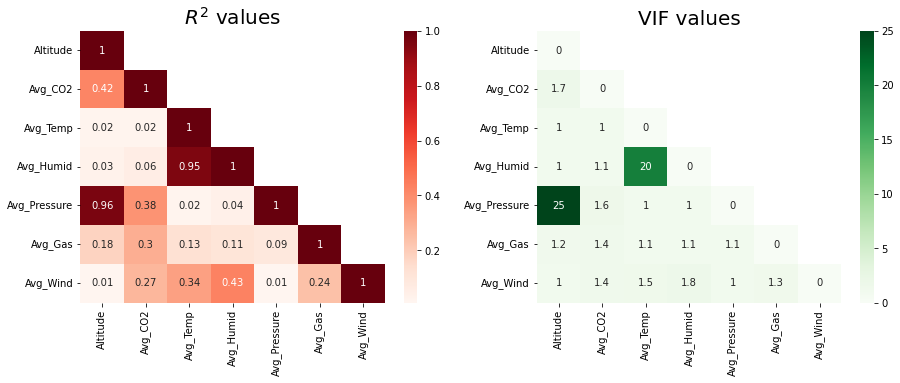

In [21]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].set_title(f'$R^2$ values', fontsize = 20)
ax[1].set_title('VIF values', fontsize = 20)

hm_regression = sns.heatmap(data=temp1, mask=mask1, cmap="Reds", annot=True, xticklabels=data.columns, yticklabels=data.columns,ax=ax[0])
hm_vif = sns.heatmap(data=temp2, mask=mask2, cmap="Greens", annot=True, xticklabels=data.columns, yticklabels=data.columns,ax=ax[1])